In [266]:
# import packages:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, roc_auc_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import PyALE
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from scipy import stats
import pandas as pd 
import numpy as np


from sklearn.ensemble import RandomForestClassifier

import shap
shap.initjs()

In [267]:
# load train churn data as:
train_data = pd.read_csv("./data/churn_train.csv")
train_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [268]:
# We check if there is null data and the data types, we can see that we need to label encode some variables
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [269]:
# preprocessing, encoding the categorical values

# variables to encode: state, area_code, international_plan, voice_mail_plan, churn variables
l_state = LabelEncoder()
train_data["state"] = l_state.fit_transform(train_data["state"])

l_international_plan = LabelEncoder()
train_data["international_plan"] = l_international_plan.fit_transform(train_data["international_plan"])

l_voice_mail_plan = LabelEncoder()
train_data["voice_mail_plan"] = l_voice_mail_plan.fit_transform(train_data["voice_mail_plan"])

l_area_code = LabelEncoder()
train_data["area_code"] = l_area_code.fit_transform(train_data["area_code"])

l_churn = LabelEncoder()
train_data["churn"] = l_churn.fit_transform(train_data["churn"])


In [270]:
# double checking encoded dataframe:
train_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [271]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   int32  
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   int32  
 3   international_plan             4250 non-null   int32  
 4   voice_mail_plan                4250 non-null   int32  
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [272]:
# variable selection with forward stepwise variable selection procedure and AUC function
# functions imported from DataCamp 'Introduction to Predictive Analytics in Python'

def auc(variables, target, basetable):    
    X = basetable[variables]    
    y = basetable[target]    
    logreg = linear_model.LogisticRegression()    
    logreg.fit(X, y)    
    predictions = logreg.predict_proba(X)[:,1]    
    auc = roc_auc_score(y, predictions)
    return(auc)

def next_best(current_variables,candidate_variables, target, basetable):    
    best_auc = -1    
    best_variable = None
    for v in candidate_variables:
        auc_v = auc(current_variables + [v], target, basetable)
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = v
    return best_variable

def auc_train_test(variables, target, train, test):
    X_train = train[variables]
    X_test = test[variables]
    Y_train = train[target]
    Y_test = test[target]
    logreg = linear_model.LogisticRegression()
    
    # Fit the model on train data
    logreg.fit(X_train, Y_train)
    
    # Calculate the predictions both on train and test data
    predictions_train = logreg.predict_proba(X_train)[:,1]
    predictions_test = logreg.predict_proba(X_test)[:,1]
    
    # Calculate the AUC both on train and test data
    auc_train = roc_auc_score(Y_train, predictions_train)
    auc_test = roc_auc_score(Y_test,predictions_test)
    return(auc_train, auc_test)

In [284]:
# we will try every variable in the dataframe until we get the combination of features that results in the highest value of AUC


candidate_variable = list(train_data.columns.values)
candidate_variable.remove("churn")
print(candidate_variable)
print(len(candidate_variable))

['state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
19


In [274]:
# What would the AUC be if we select 6 features 
# It is important to run the cell above (Cell 273) first, then run this cell 

current_variables = []
target = ['churn']
max_number_variables = 6
number_iterations = min(max_number_variables, len(candidate_variable))
basetable = train_data

for i in range(0,number_iterations):    
    next_var = next_best(current_variables,candidate_variable,target,basetable)    
    current_variables = current_variables + [next_var]    
    candidate_variable.remove(next_var)
print(current_variables)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

['total_day_charge', 'number_customer_service_calls', 'international_plan', 'voice_mail_plan', 'total_eve_charge', 'total_night_minutes']


In [276]:
# With 6 features, we are getting an AUC of 0.83

testauc = auc(current_variables, ['churn'], train_data)
print(round(testauc,2))

0.83


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [349]:
# we will try every variable in the dataframe until we get the combination of features that results in the highest value of AUC


candidate_variable = list(train_data.columns.values)
candidate_variable.remove("churn")
print(candidate_variable)
print(len(candidate_variable))

['state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
19


In [350]:
# What would the AUC be if we select 4 features  


current_variables = []
target = ['churn']
max_number_variables = 4
number_iterations = min(max_number_variables, len(candidate_variable))
basetable = train_data

for i in range(0,number_iterations):    
    next_var = next_best(current_variables,candidate_variable,target,basetable)    
    current_variables = current_variables + [next_var]    
    candidate_variable.remove(next_var)
print(current_variables)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


['total_day_charge', 'number_customer_service_calls', 'international_plan', 'voice_mail_plan']


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [351]:
print(current_variables)


print(len(current_variables))

['total_day_charge', 'number_customer_service_calls', 'international_plan', 'voice_mail_plan']
4


In [352]:
# we test the AUC for this set of variables, if we keep adding more variables to the model the AUC won't increase, instead at variable number 11 the AUC starts to decrease:
# With 4 features, we are getting an AUC of 0.82

testauc = auc(current_variables, ['churn'], train_data)
print(round(testauc,2))

0.82


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [214]:
international_plan, voice_mail_plan, number_vmail_messages, total_day_minutes, total_day_charge, number_customer_service_calls

NameError: name 'international_plan' is not defined

In [288]:
print(current_variables)

['total_day_charge', 'number_customer_service_calls', 'international_plan', 'voice_mail_plan']


In [21]:
# These 4 features should be the result of print(current_variables)
['total_day_charge', 'number_customer_service_calls', 'international_plan', 'voice_mail_plan']

['total_day_charge',
 'number_customer_service_calls',
 'international_plan',
 'voice_mail_plan']

In [ ]:
# should we stay with 4 variables and AUC of 0.82 or can we get the six variables and increase the AUC to 0.83 
# Is it worth it to manage 2 more variables for this little increase?
# After giving this some thought, we decided to check for correlation between variables using the pearson test to calculate their respective p-values

In [300]:
# we evaluate pearson correlation and it's p value 
# we want to see which features are correlated with each other

coef_correlation_list = []
p_correlation_list = []
name_column = []

for (index,column) in enumerate(train_data.columns): 
    a = train_data[column]
    b = train_data['churn']
    coef, p =  stats.pearsonr(a, b)
    
    #we define a small p value to validate what candidates are the ones we're keeping
    if p < 0.0001:
        name_column.append(column)
        coef_correlation_list.append(coef)
        p_correlation_list.append(p)
    


In [301]:
print(name_column)
print(coef_correlation_list)
print(p_correlation_list)

['international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 'number_customer_service_calls', 'churn']
[0.25905290038281653, -0.11464257735226933, -0.10034652788878354, 0.21527160111755203, 0.21526321750199925, 0.07885521827356277, 0.07885161477228395, 0.22122027213513562, 0.9999999999999968]
[3.930532359515634e-66, 6.563964037391101e-14, 5.511380934297261e-11, 9.613748127666581e-46, 9.691717969016598e-46, 2.6435352850591054e-07, 2.646861277171691e-07, 2.858849472624233e-48, 0.0]


In [ ]:
# Variables 'total_day_minutes' and 'total_day_charge' have extremely high correlation (9.6e**-46)
# Variables 'total_eve_minutes' and 'total_eve_charge' have extremely high correlation (2.6e**-07)
# Therefore, only selecting 1 variable out of these 4 is enough

In [302]:
# So after taking out these extremely correlated variables aboe, our selection of 4 current_variables makes sense
current_variables

['total_day_charge',
 'number_customer_service_calls',
 'international_plan',
 'voice_mail_plan']

Provide some initial insights in the dataset (e.g., number of customers, number of churners, 
number of churners in international plans, etc.) and the underlying business problem.

In [293]:
train_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [294]:
# total number of churners in international plans
train_data[train_data['international_plan']==1]['churn'].value_counts()
# it seems that this feature is one of the most important, as 42% of the clients that have an international plan have churned

0    229
1    167
Name: churn, dtype: int64

In [295]:
# total number of churners 
train_data['churn'].value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [296]:
# Total number of customers 
train_data.value_counts()

state  account_length  area_code  international_plan  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  total_night_charge  total_intl_minutes  total_intl_calls  total_intl_charge  number_customer_service_calls  churn
0      36              0          0                   1                30                     146.3              128              24.87             162.5              80               13.81             129.3                109                5.82                14.5                6                 3.92               0                              0        1
35     82              1          0                   0                0                      207.2              114              35.22             163.7              97               13.91             192.8                79                 8.68                9.3                 4

In [33]:
train_data[train_data['voice_mail_plan']==1]['churn'].value_counts()
# for this feature we get that 7% of the clientes that have a voice mail plan have churned.

0    1030
1      82
Name: churn, dtype: int64

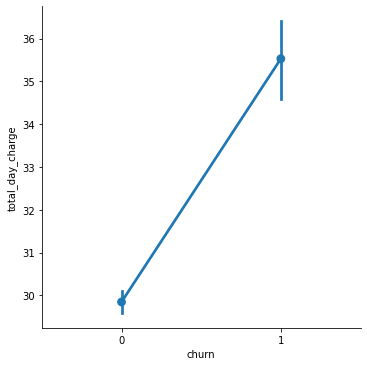

In [297]:
# We did some Preliminary exploratory analysis of the impact on churn behavior by total_day_charge
# There is a positive relationship between churn behavior and total_day_charge
# When total day charge increase, customers tend to churn 
sns.catplot(x="churn", y="total_day_charge", kind="point", data=train_data)

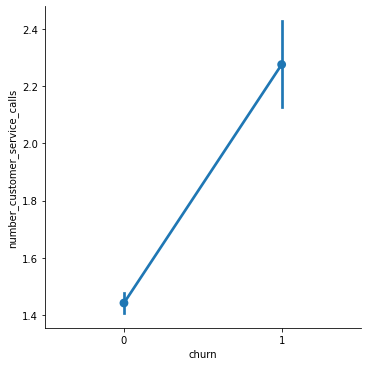

In [39]:
# We did some Preliminary exploratory analysis of the impact on churn behavior by number_customer_service_calls
# There is a positive relationship between churn behavior and number_customer_service_calls
# when number of customer service calls increase, customers tend to churn
sns.catplot(x="churn", y='number_customer_service_calls', kind="point", data=train_data)

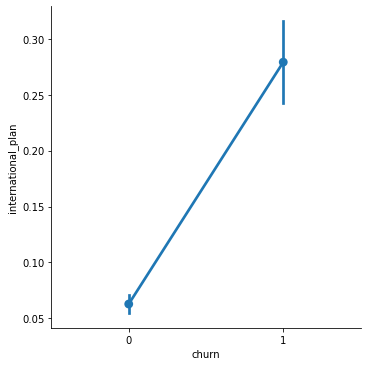

In [298]:
# We did some Preliminary exploratory analysis of the impact on churn behavior by international_plan
# There is a positive relationship between churn behavior and international_plan
# when customers have an international plan, they tend to churn
sns.catplot(x="churn", y='international_plan', kind="point", data=train_data)

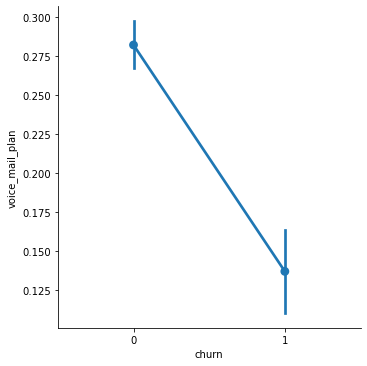

In [299]:
# We did some Preliminary exploratory analysis of the impact on churn behavior by voice_mail_plan
# There is a negative relationship between churn behavior and voice_mail_plan
# when customers have a voicemail plan, they tend to not churn
sns.catplot(x="churn", y='voice_mail_plan', kind="point", data=train_data)

# First model, Logistic Regression Model:

In [304]:
# We have selected the Logistic Regression Model to be our linear model
# Logistic Regression Model

# split data in train and test (stratify y)
X = train_data[['total_day_charge','number_customer_service_calls','international_plan','voice_mail_plan']] 
y = train_data[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.3, random_state=42)

# fit model
logreg = LogisticRegression(fit_intercept=True)
logreg = logreg.fit(X_train, y_train)

# predict
pred_train1 = logreg.predict_proba(X_train)[:,1]
pred_test1 = logreg.predict_proba(X_test)[:,1]


auc_log_1 = roc_auc_score(y_train, pred_train1)
print(auc_log_1)
auc_log_2 = roc_auc_score(y_test, pred_test1)
print(auc_log_2)

0.8278471545262025
0.8006794641764874


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [91]:
# In general, an AUC of 0.5 suggests no discrimination / random / average value (i.e., ability to diagnose patients with 
# and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 
# 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.

# Black Box Models on train dataset
# Neural network 

In [305]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error

In [306]:
# We have selected Neural Network to be our first black box model
# Neural Network
mlp_cla = MLPClassifier(hidden_layer_sizes=(32, 32, 16, 16), batch_size=16, early_stopping=True, random_state=42)
mlp_cla = mlp_cla.fit(X_train.values, y_train) # .values transforms df in np.array (avoid sklearn warning)

# # predict
# pred_train = mlp_reg.predict(X_train.values) # .values transforms df in np.array (avoid sklearn warning)
# pred_test = mlp_reg.predict(X_test.values) # .values transforms df in np.array (avoid sklearn warning)

# # evaluate predictions
# mlp_mae_train = mean_absolute_error(y_train, pred_train)
# mlp_mae_test = mean_absolute_error(y_test, pred_test)

# predict
pred_train2 = mlp_cla.predict_proba(X_train)[:,1]
pred_test2 = mlp_cla.predict_proba(X_test)[:,1]

auc_neural_1 = roc_auc_score(y_train, pred_train2)
print(auc_neural_1)
auc_neural_2 = roc_auc_score(y_test, pred_test2)
print(auc_neural_2)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.8924328922354066
0.871393691636423


X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names


# Random Forest

In [308]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [310]:
# We have selected Random Forest to be our 2nd black box model
# Random Forest

# fit random forest
rf = RandomForestClassifier(max_depth= 6, random_state=42).fit(X_train,y_train)

# predict
pred_train3 = rf.predict_proba(X_train)[:,1]
pred_test3 = rf.predict_proba(X_test)[:,1]

auc_rf_1 = roc_auc_score(y_train, pred_train3)
print(auc_rf_1)
auc_rf_2 = roc_auc_score(y_test, pred_test3)
print(auc_rf_2)




A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.9294710186336795
0.8783336051869672


In [111]:
# The depth of the tree should be enough to split each node to your desired number of observations. There has been some 
# work that says best depth is 5-8 splits. We decide to go with 6 splits.

In [311]:
# Extract feature importance
pd.DataFrame(rf.feature_importances_, index = X.columns, columns = ['Feature importance'])

,Feature importance
total_day_charge,0.521339
number_customer_service_calls,0.243988
international_plan,0.146357
voice_mail_plan,0.088316


In [312]:
# We evaluate the 3 AUC scores for each of our 3 model:
eval_dict = {
    
     "Logistic Regression":{
        "AUC_train":auc_log_1,
        "AUC_test":auc_log_2
    },   
    "Neural Network":{
        "AUC_train":auc_neural_1,
        "AUC_test":auc_neural_2
    },
    "Random Forest":{
        "AUC_train":auc_rf_1,
        "AUC_test":auc_rf_2
    }
}

eval_df = pd.DataFrame(eval_dict)
eval_df


# # evaluate predictions
# acc_train = accuracy_score(y_train, pred_train)
# acc_test = accuracy_score(y_test, pred_test)

# print(f"Train:\tACC={acc_train:.4f}")
# print(f"Test:\tACC={acc_test:.4f}")

,Logistic Regression,Neural Network,Random Forest
AUC_train,0.827847,0.892433,0.929471
AUC_test,0.800679,0.871394,0.878334


In [162]:
# Conclusion about our best performing model: Our best performing model is the one with the highest AUC for the train 
# partition, therefore Random Forest performs the best. We will use this model for the next steps.

# 3 Interpretability Techniques on the test dataset
# PDP, Shapley, ALE

In [313]:
# Train and evaluate the model on churn_train.csv and interpret the model predictions on churn_test.csv.
# load churn_test data as:
test_data = pd.read_csv("./data/churn_test.csv")
test_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [315]:
# Preprocessing the Test Data, encoding the categorical values


l_state = LabelEncoder()
test_data["state"] = l_state.fit_transform(test_data["state"])

l_international_plan = LabelEncoder()
test_data["international_plan"] = l_international_plan.fit_transform(test_data["international_plan"])

l_voice_mail_plan = LabelEncoder()
test_data["voice_mail_plan"] = l_voice_mail_plan.fit_transform(test_data["voice_mail_plan"])

l_area_code = LabelEncoder()
test_data["area_code"] = l_area_code.fit_transform(test_data["area_code"])



In [316]:
test_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,1,118,2,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,12,62,1,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,46,93,2,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,29,174,1,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [317]:
X_test_data = test_data[['total_day_charge','number_customer_service_calls','international_plan','voice_mail_plan']]



In [318]:
X_test_data

,total_day_charge,number_customer_service_calls,international_plan,voice_mail_plan
0,45.07,1,0,1
1,37.98,0,1,0
2,20.52,4,0,0
3,32.42,3,0,0
4,21.13,3,0,0
...,...,...,...,...
745,20.30,0,0,0
746,30.12,3,0,0
747,31.31,3,0,0
748,23.90,1,0,0


<AxesSubplot:>

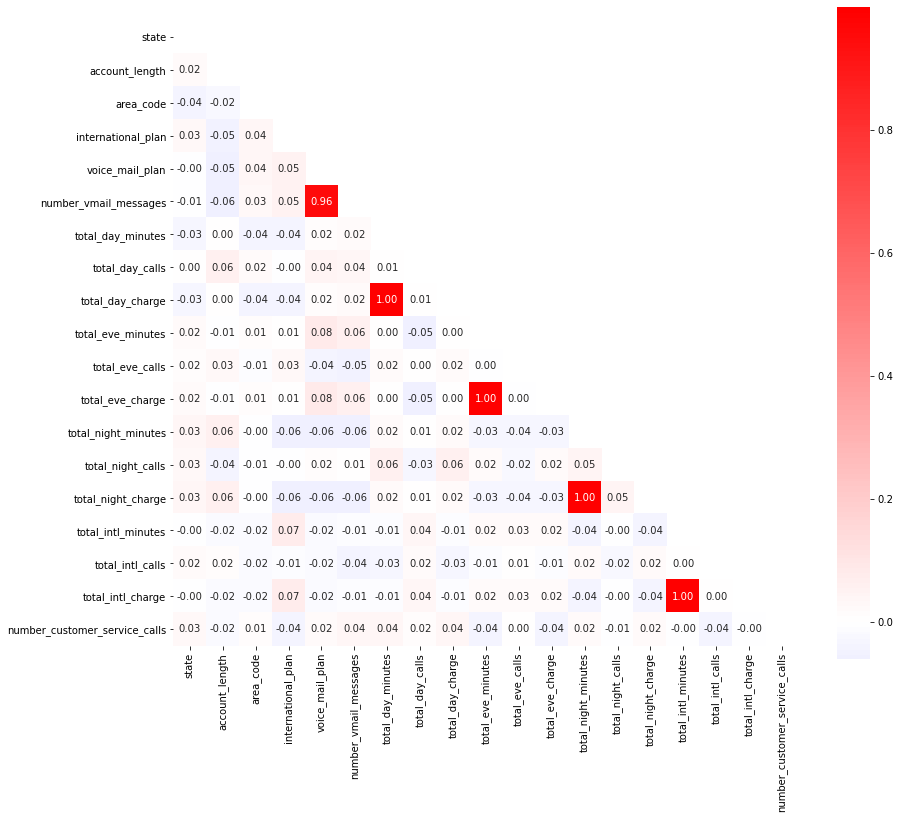

In [56]:
# We ran some preliminary exploratory analysis on the churn test dataset
# Here we are checking for correlations between all the features in the test dataset

# Compute the correlation matrix
corr = test_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Heatmap
fig = plt.figure(figsize=(14,12))
sns.heatmap(corr, mask=mask, cmap=plt.cm.bwr, center=0, annot=True, fmt='.2f', square=True)

<AxesSubplot:>

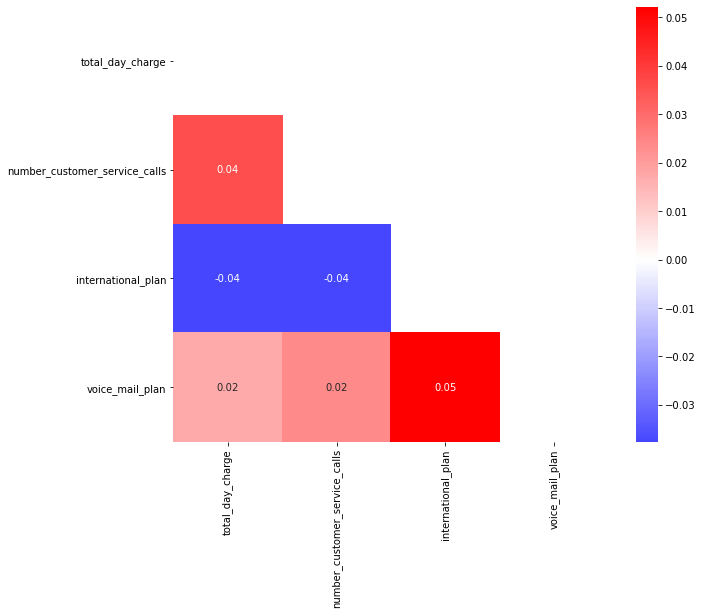

In [55]:
# We ran some preliminary exploratory analysis on the churn test dataset
# Here we are checking for correlations between our selected 4 features in the test dataset

# Compute the correlation matrix
corr = X_test_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Heatmap
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, cmap=plt.cm.bwr, center=0, annot=True, fmt='.2f', square=True)

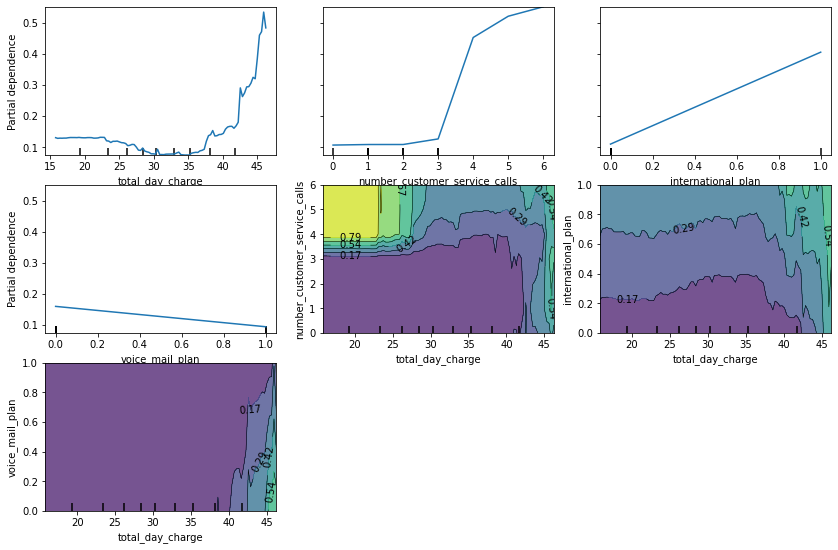

In [319]:
# Interpretability Technique 1: PDP
# PDP for total_day_charge, number_customer_service_calls, international_plan, voice_mail_plan
# The first 4 plots are 1D PDP exploring the impact of 1 feature towards churn, the last 3 plots are 2D PDP exploring the impact among the features

fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(estimator=rf, X=X_test_data, features=[0,1,2,3,(0,1), (0,2), (0,3)], ax=ax)
fig.tight_layout(pad=2.0)

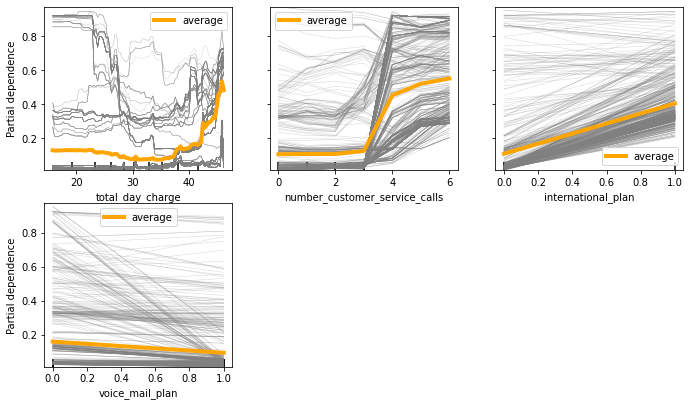

In [322]:
# Interpretability Technique 2: ICE
# ICE
# These are 1D plots exploring the impact of 1 feature towards churn behavior
# The average of each ICE line represent the PDP plot

fig, ax = plt.subplots(figsize=(10, 6))
ice = PartialDependenceDisplay.from_estimator(estimator=rf,
                        X=X_test_data,
                        features=[0,1,2,3],
                        kind="both",
                        ice_lines_kw={"color":"#808080","alpha": 0.3, "linewidth": 0.5},
                        pd_line_kw={"color": "#ffa500", "linewidth": 4, "alpha":1},
                        ax=ax)
fig.tight_layout(pad=2.0)

In [159]:
# Streng & Weaknesses with PDP and ICE?

Shapley Values for Random Forest Model in the Test Data 

In [323]:
#Interpretability Technique 3: Shapley Values

# set up explainer for ".predict" method
explainer = shap.Explainer(rf.predict, X_test_data)

# compute shap values
shap_values = explainer(X_test_data)

Exact explainer: 751it [00:24, 17.51it/s]                                                                              


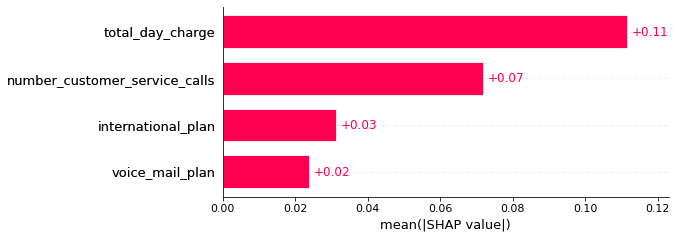

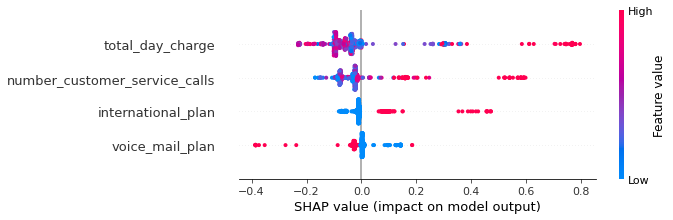

In [324]:
# Feature importance (global)
# This shows the 4 feature influence on churn behavior in our churn_test dataset as a whole

# bar chart
shap.plots.bar(shap_values)

# individual dots for each instance
shap.plots.beeswarm(shap_values)


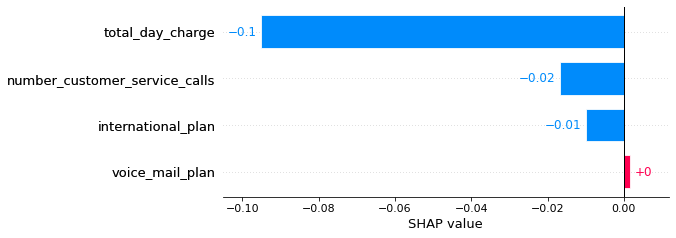

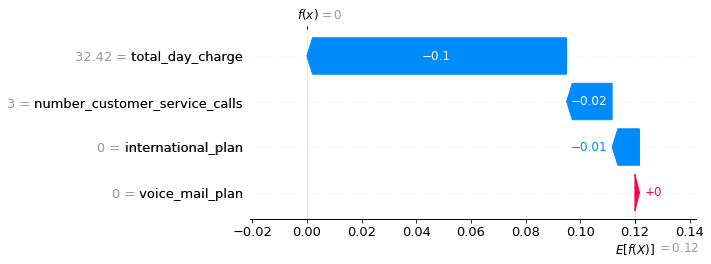

In [329]:
# explain individual instance (local)
# each instance is 1 customer, first instance is the prediction for customer #1 in the test dataset
# however, as we do not have customerID in this dataset, this analysis is not useful to look at individual customer cases

instance = 3
# feature importance
shap.plots.bar(shap_values[instance])

# contribution to output
shap.plots.waterfall(shap_values[instance])

In [330]:
# Explain probability predictions (for one or more classes)
# initialize explainer

explainer = shap.Explainer(rf)

# compute shapley values 
shap_values = explainer.shap_values(X_test_data)

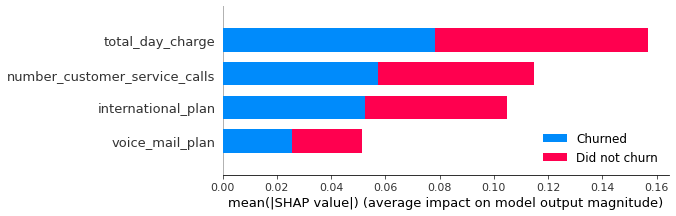

In [331]:
# Comparing with Cell 324, here we marked the "churned" customers and "Did not churn" customers in all global test_churn dataset
# This is to prepare for Cell 97, where we plot the 4 feature influence on churn behavior in a "churned" subset of our test_data

# feature importance (global)
# average shapley values 
shap.summary_plot(shap_values, X_test_data, class_names=["Did not churn", "Churned"])

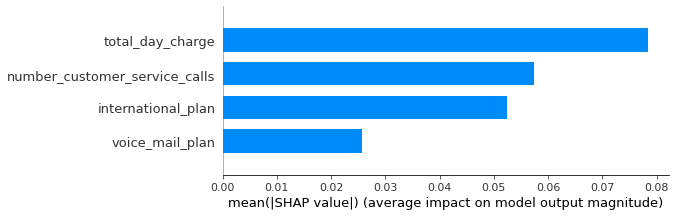

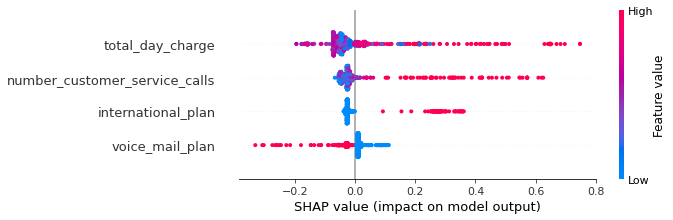

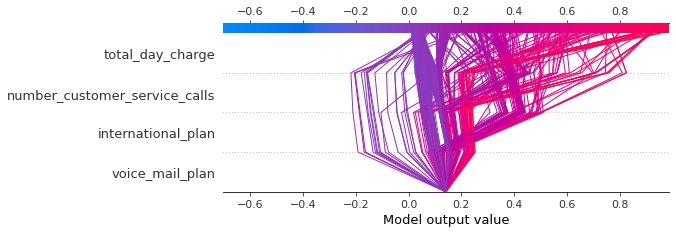

In [332]:
# Comparing with Cell 324, this shows the 4 feature influence on churn behavior in a "churned" subset of our test_data
# total_day_charge has the biggest influence on churn, next is number_customer_service_calls, next is international_plan
# this result gives the same rank of variable impacts as Cell 324, which means the impact of churn is the same locally and globally

# feature importance for a specific target class
target = 1 # (Churned)

# distribution of shapley values for target
shap.summary_plot(shap_values[target], X_test_data, plot_type="bar")
shap.summary_plot(shap_values[target], X_test_data, plot_type="dot")

# decision plot for target
shap.decision_plot(explainer.expected_value[target], shap_values[target], X_test_data)

# force plot for target
shap.force_plot(explainer.expected_value[target], shap_values[target], X_test_data)

ALE Plots for Random Forest Model 

In [333]:
import PyALE

In [334]:
#Interpretability Technique 4: ALE

# adapt PyALE.ale function to incorporate classification models 
# reference: https://htmlpreview.github.io/?https://github.com/DanaJomar/PyALE/blob/master/examples/ALE%20plots%20for%20classification%20models.html
def ale(target=None, print_meanres=False, **kwargs):
    if target is not None:
        class clf():
            def __init__(self, classifier):
                self.classifier = classifier
            def predict(self, X):
                return(self.classifier.predict_proba(X)[:, target])
        clf_dummy = clf(kwargs["model"])
        kwargs["model"] = clf_dummy
    if (print_meanres & len(kwargs["feature"])==1):
        mean_response = np.mean(kwargs["model"].predict(kwargs["X"]), axis=0)
        print(f"Mean response: {mean_response:.5f}")
    return PyALE.ale(**kwargs)


X has feature names, but MLPClassifier was fitted without feature names
PyALE._ALE_generic:INFO: Continuous feature detected.
X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names


Mean response: 0.17125


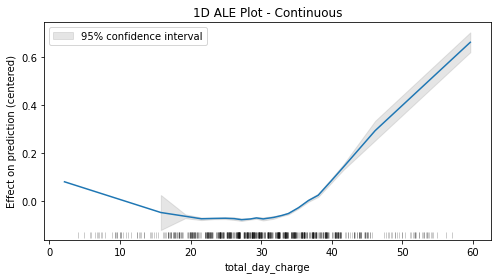

In [335]:
# ALE plot 1D - total_day_charge, target=1 (churn)
#1st Plot for 1st Feature
ale_total_day_charge = ale(
    X=X_test_data,
    model=mlp_cla,
    feature=["total_day_charge"],
    include_CI=True,
    target=1,
    print_meanres=True
)

In [336]:
ale_total_day_charge

,eff,size,lowerCI_95%,upperCI_95%
total_day_charge,,,,
2.13,0.079715,0.0,NaN,NaN
15.78,-0.048431,38.0,-0.121458,0.024595
19.24,-0.064112,37.0,-0.072175,-0.056049
21.51,-0.074603,38.0,-0.080147,-0.069058
23.34,-0.073083,37.0,-0.076302,-0.069864
24.92,-0.072338,38.0,-0.076078,-0.068597
26.18,-0.073981,37.0,-0.079422,-0.068541
27.22,-0.078403,39.0,-0.083659,-0.073147
28.46,-0.075367,37.0,-0.077875,-0.072859


X has feature names, but MLPClassifier was fitted without feature names
PyALE._ALE_generic:INFO: Discrete feature detected.
X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names


Mean response: 0.17125


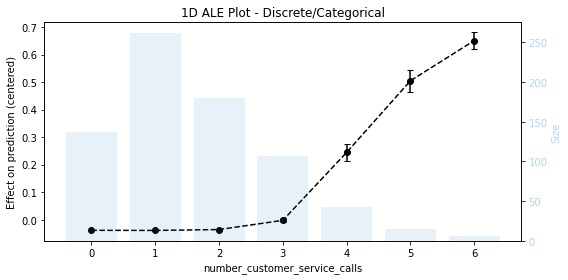

In [337]:
# ALE plot 1D - number_customer_service_calls, target=1 (churn)
#2nd Plot for 2nd Feature
ale_number_customer_service_calls = ale(
    X=X_test_data,
    model=mlp_cla,
    feature=["number_customer_service_calls"],
    include_CI=True,
    target=1,
    print_meanres=True
)

In [338]:
ale_number_customer_service_calls

,eff,size,lowerCI_95%,upperCI_95%
number_customer_service_calls,,,,
0,-0.038270,137,NaN,NaN
1,-0.038717,262,-0.040633,-0.036801
2,-0.035505,180,-0.038774,-0.032236
3,-0.002065,107,-0.009797,0.005667
4,0.244714,43,0.212845,0.276583
5,0.504823,15,0.465733,0.543912
6,0.650608,6,0.620648,0.680569


X has feature names, but MLPClassifier was fitted without feature names
PyALE._ALE_generic:INFO: Discrete feature detected.
X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names


Mean response: 0.17125


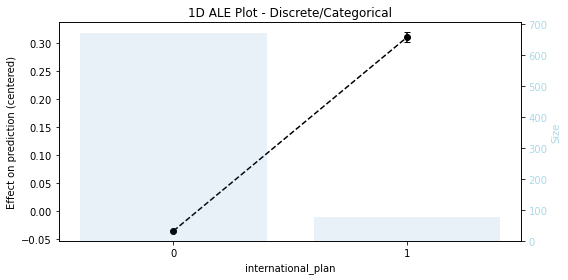

In [339]:
# ALE plot 1D - international_plan, target=1 (churn)
# 3rd Plot for 3rd Feature
# international_plan==1 impacts churn directly, does that mean the international plan is not so good? Company should review international plan?
ale_international_plan = ale(
    X=X_test_data,
    model=mlp_cla,
    feature=["international_plan"],
    include_CI=True,
    target=1,
    print_meanres=True
)

In [340]:
ale_international_plan

,eff,size,lowerCI_95%,upperCI_95%
international_plan,,,,
0,-0.035562,673,NaN,NaN
1,0.310820,77,0.302044,0.319596


X has feature names, but MLPClassifier was fitted without feature names
PyALE._ALE_generic:INFO: Discrete feature detected.
X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names


Mean response: 0.17125


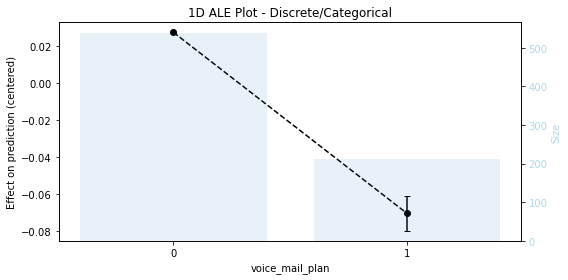

In [341]:
# ALE plot 1D - voice_mail_plan, target=1 (churn)
# 4th Plot for 4th Feature
# For voice_mail_plan == 1, the predicted probability is 0.08 lower compared to the average prediction
# customers with a voice mail plan is more unlikely to churn

ale_voice_mail_plan = ale(
    X=X_test_data,
    model=mlp_cla,
    feature=["voice_mail_plan"],
    include_CI=True,
    target=1,
    print_meanres=True
)

In [342]:
ale_voice_mail_plan

,eff,size,lowerCI_95%,upperCI_95%
voice_mail_plan,,,,
0,0.027591,539,NaN,NaN
1,-0.070482,211,-0.080003,-0.060962


X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names
Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


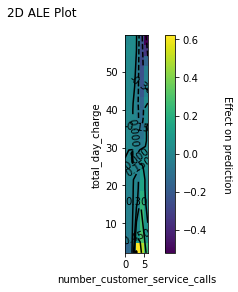

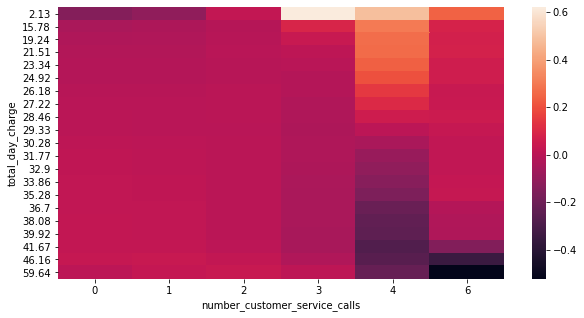

In [343]:
# ALE plot 2D - [total_day_charge, number_customer_service_calls], target=1 (churn)

ale_2d_1 = ale(
    X=X_test_data,
    model=mlp_cla,
    feature=["total_day_charge", "number_customer_service_calls"],
    contour=True,
    target=1)
fig = plt.figure(figsize=(10,5))
sns.heatmap(ale_2d_1)
fig.show()

X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names
Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


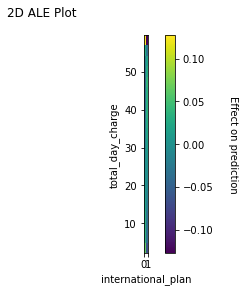

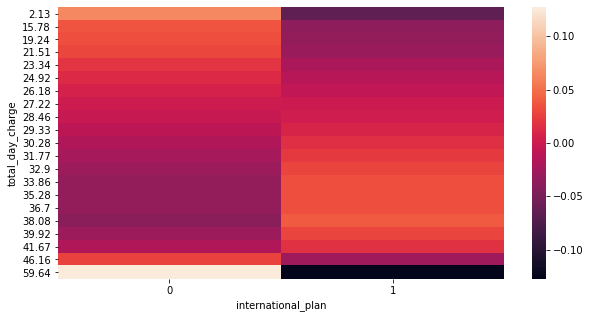

In [344]:
# ALE plot 2D - [total_day_charge, international_plan], target=1 (churn)

ale_2d_2 = ale(
    X=X_test_data,
    model=mlp_cla,
    feature=["total_day_charge", "international_plan"],
    contour=False,
    target=1)
fig = plt.figure(figsize=(10,5))
sns.heatmap(ale_2d_2)
fig.show()

X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names
Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


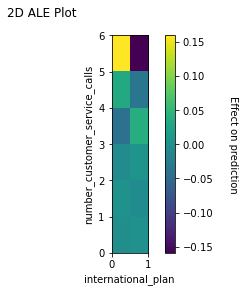

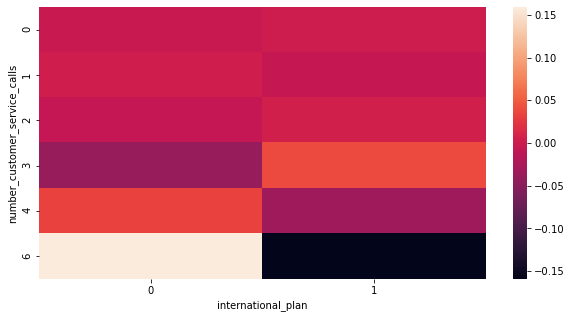

In [353]:
# ALE plot 2D - [number_customer_service_calls, international_plan], target=1 (churn)

ale_2d_3 = ale(
    X=X_test_data,
    model=mlp_cla,
    feature=["number_customer_service_calls", "international_plan"],
    contour=False,
    target=1)
fig = plt.figure(figsize=(10,5))
sns.heatmap(ale_2d_2)
fig.show()

# Interesting subsets of the full dataset 1: test_data['international_plan']==1

In [354]:
test_data_int_plan = test_data[test_data['international_plan']==1]

In [355]:
# our sample is reduced to 77... we will see if it's enough to run our Interpretability techniques
test_data_int_plan['international_plan'].value_counts()

1    77
Name: international_plan, dtype: int64

In [356]:
test_data_int_plan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 1 to 731
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          77 non-null     int64  
 1   account_length                 77 non-null     int64  
 2   area_code                      77 non-null     int64  
 3   international_plan             77 non-null     int64  
 4   voice_mail_plan                77 non-null     int64  
 5   number_vmail_messages          77 non-null     int64  
 6   total_day_minutes              77 non-null     float64
 7   total_day_calls                77 non-null     int64  
 8   total_day_charge               77 non-null     float64
 9   total_eve_minutes              77 non-null     float64
 10  total_eve_calls                77 non-null     int64  
 11  total_eve_charge               77 non-null     float64
 12  total_night_minutes            77 non-null     floa

In [357]:
X_test_data_subset_int_plan = test_data_int_plan[['total_day_charge','number_customer_service_calls','international_plan','voice_mail_plan']]
X_test_data_subset_int_plan.head(2)

,total_day_charge,number_customer_service_calls,international_plan,voice_mail_plan
1,37.98,0,1,0
26,46.16,1,1,0


In [358]:
X_test_data_subset_int_plan.head()

,total_day_charge,number_customer_service_calls,international_plan,voice_mail_plan
1,37.98,0,1,0
26,46.16,1,1,0
37,38.54,2,1,0
54,38.00,2,1,1
60,41.58,1,1,0


<AxesSubplot:>

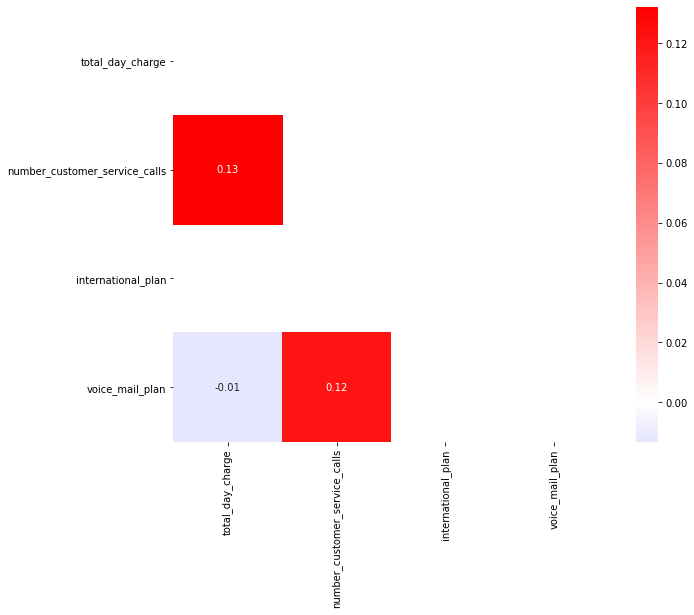

In [359]:
# We ran some preliminary exploratory analysis on the churn test dataset
# Here we are checking for correlations between our selected 4 features in the test dataset

# Compute the correlation matrix
corr = X_test_data_subset_int_plan.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Heatmap
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, cmap=plt.cm.bwr, center=0, annot=True, fmt='.2f', square=True)

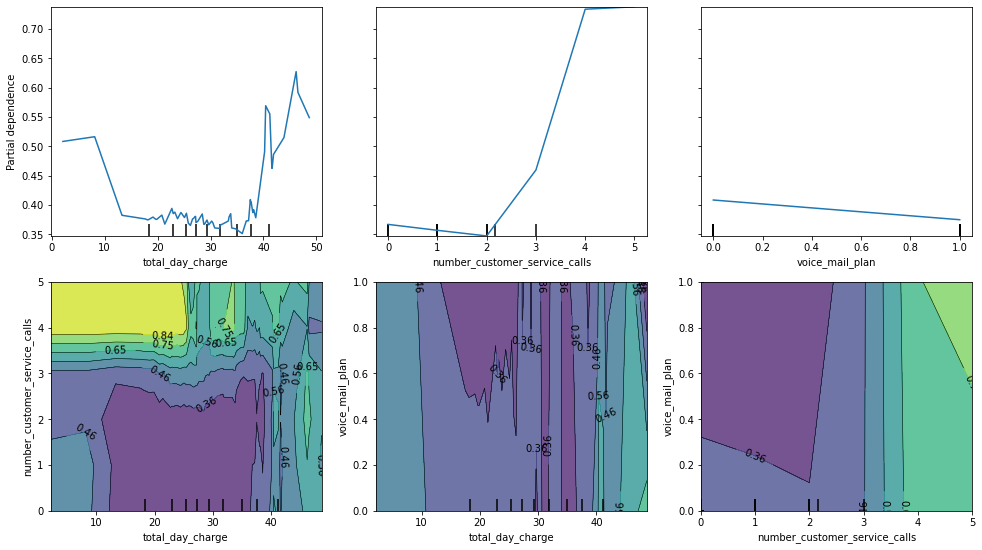

In [360]:
# Interpretability Technique 1: PDP FOR SUBSET INT PLAN = 1
# PDP for total_day_charge, number_customer_service_calls, international_plan, voice_mail_plan
# The first 4 plots are 1D PDP exploring the impact of 1 feature towards churn, the last 3 plots are 2D PDP exploring the impact among the features
# For the feature "number_customer_service_calls" theres a change in the way the curve slope becomes more drastic, therefore, for clients that have international plan acquired the breaking point for churn would be 3 instead of 4
fig, ax = plt.subplots(figsize=(14, 8))
PartialDependenceDisplay.from_estimator(estimator=rf, X=X_test_data_subset_int_plan, features=[0,1,3,(0,1),(0,3),(1,3)], ax=ax)
fig.tight_layout(pad=2.0)

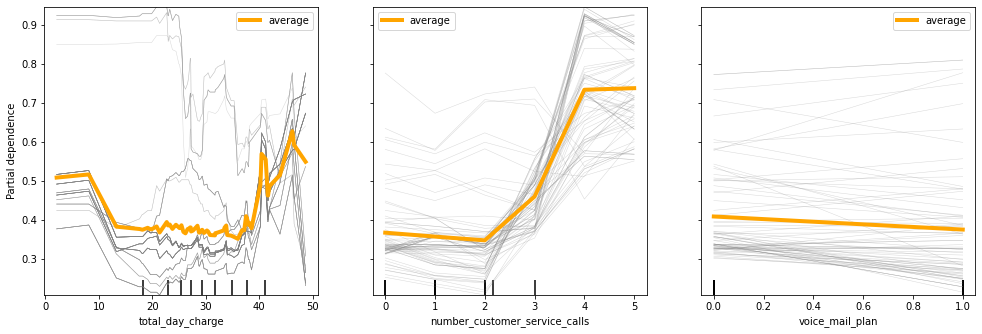

In [361]:
# Interpretability Technique 2: ICE FOR SUBSET INTERNATIONAL PLAN
# These are 1D plots exploring the impact of 1 feature towards churn behavior
# The average of each ICE line represent the PDP plot

fig, ax = plt.subplots(figsize=(14, 5))
ice = PartialDependenceDisplay.from_estimator(estimator=rf,
                        X=X_test_data_subset_int_plan,
                        features=[0,1,3],
                        kind="both",
                        ice_lines_kw={"color":"#808080","alpha": 0.3, "linewidth": 0.5},
                        pd_line_kw={"color": "#ffa500", "linewidth": 4, "alpha":1},
                        ax=ax)
fig.tight_layout(pad=2.0)

In [ ]:
#For the ICE Plots we can see that Partial dependance changes a bit: 
#The probability increases when there is a low total day change and when it is above 37. 
#Instead our original plot showed us that Total day charge was significant enough after 40. 
#Same behaviour is seen for the number_customer_service_calls as we saw on the PDP, there is a change in the impact of this feature on the probability, it increases the probability of churn.

# Interesting subsets of the full dataset 2: test_data['total_day_charge'] > mean (30.677)

In [362]:
test_data['total_day_charge'].mean()

30.677920000000007

In [363]:
test_data_Day_Charge_More_Than_Mean = test_data[test_data['total_day_charge']>test_data['total_day_charge'].mean()]

In [364]:
test_data_Day_Charge_More_Than_Mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 749
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          363 non-null    int64  
 1   account_length                 363 non-null    int64  
 2   area_code                      363 non-null    int64  
 3   international_plan             363 non-null    int64  
 4   voice_mail_plan                363 non-null    int64  
 5   number_vmail_messages          363 non-null    int64  
 6   total_day_minutes              363 non-null    float64
 7   total_day_calls                363 non-null    int64  
 8   total_day_charge               363 non-null    float64
 9   total_eve_minutes              363 non-null    float64
 10  total_eve_calls                363 non-null    int64  
 11  total_eve_charge               363 non-null    float64
 12  total_night_minutes            363 non-null    flo

In [365]:
test_data_Day_Charge_More_Than_Mean_Subset_Features = test_data_Day_Charge_More_Than_Mean[['total_day_charge','number_customer_service_calls','international_plan','voice_mail_plan']]

In [366]:
test_data_Day_Charge_More_Than_Mean_Subset_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 749
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   total_day_charge               363 non-null    float64
 1   number_customer_service_calls  363 non-null    int64  
 2   international_plan             363 non-null    int64  
 3   voice_mail_plan                363 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 14.2 KB


<AxesSubplot:>

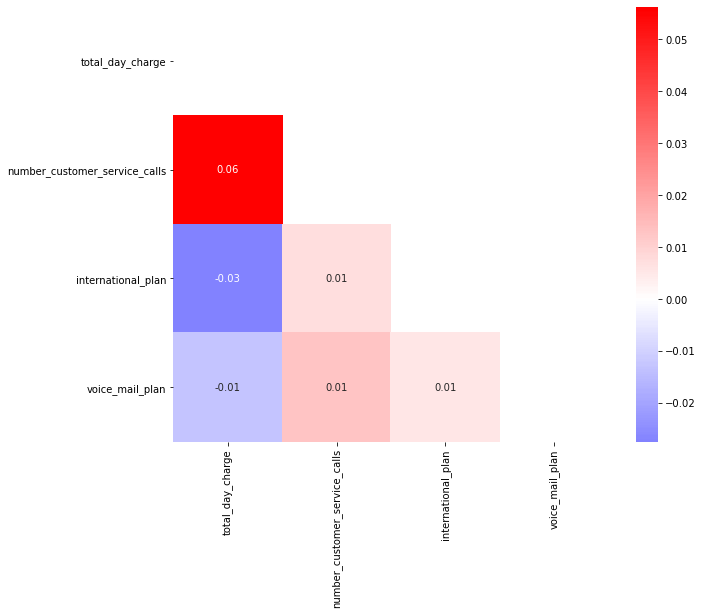

In [367]:
# New subset of 363 entries 
# We ran some preliminary exploratory analysis on the churn test dataset
# Here we are checking for correlations between our selected 4 features in the test dataset

# Compute the correlation matrix
corr = test_data_Day_Charge_More_Than_Mean_Subset_Features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Heatmap
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, cmap=plt.cm.bwr, center=0, annot=True, fmt='.2f', square=True)

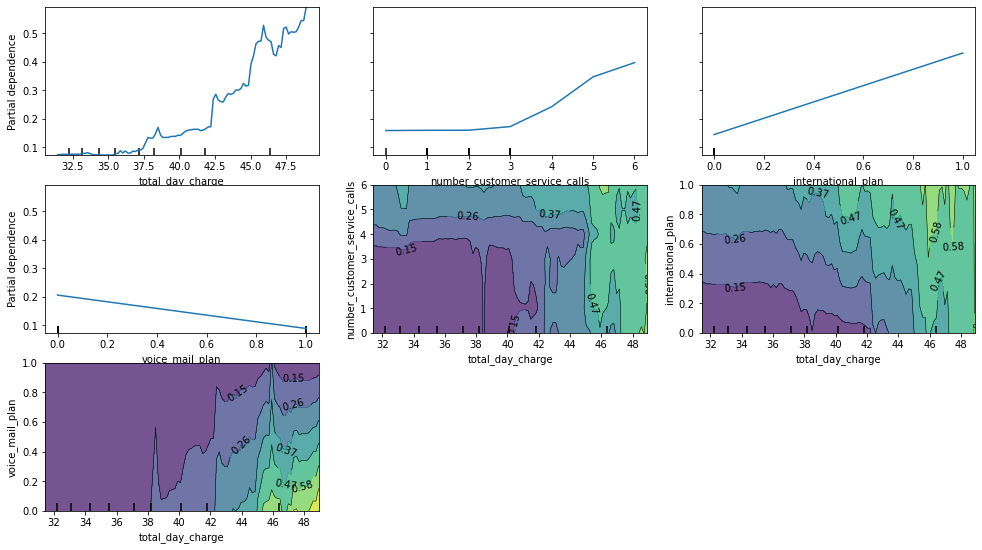

In [368]:
# Interpretability Technique 1: PDP FOR SUBSET Day Charge More Than Mean Subset > 30.6
# PDP for total_day_charge, number_customer_service_calls, international_plan, voice_mail_plan
# The first 4 plots are 1D PDP exploring the impact of 1 feature towards churn, the last 3 plots are 2D PDP exploring the impact among the features

fig, ax = plt.subplots(figsize=(14, 8))
PartialDependenceDisplay.from_estimator(estimator=rf, X=test_data_Day_Charge_More_Than_Mean_Subset_Features, features=[0,1,2,3,(0,1), (0,2), (0,3)], ax=ax)
fig.tight_layout(pad=2.0)

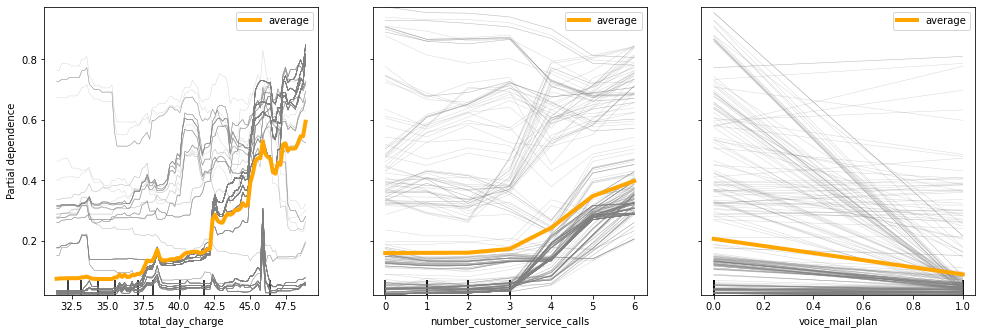

In [369]:
# Interpretability Technique 2: ICE FOR SUBSET INTERNATIONAL PLAN
# These are 1D plots exploring the impact of 1 feature towards churn behavior
# The average of each ICE line represent the PDP plot

fig, ax = plt.subplots(figsize=(14, 5))
ice = PartialDependenceDisplay.from_estimator(estimator=rf,
                        X=test_data_Day_Charge_More_Than_Mean_Subset_Features,
                        features=[0,1,3],
                        kind="both",
                        ice_lines_kw={"color":"#808080","alpha": 0.3, "linewidth": 0.5},
                        pd_line_kw={"color": "#ffa500", "linewidth": 4, "alpha":1},
                        ax=ax)
fig.tight_layout(pad=2.0)

# Interesting subsets of the full dataset 3: test_data["number_customer_service_calls"] > 4

In [371]:
test_data_Numer_Customer_Calls_More_Than_4 = test_data[test_data["number_customer_service_calls"] > 4]
test_data_Numer_Customer_Calls_More_Than_4.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
9,13,119,1,0,0,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5
10,50,87,1,0,0,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5
22,34,75,1,0,1,21,175.8,97,29.89,217.5,106,18.49,237.5,134,10.69,5.3,4,1.43,5
50,6,96,1,0,1,37,172.7,93,29.36,120.1,116,10.21,216.1,86,9.72,10.3,5,2.78,5
121,44,68,1,0,0,0,162.1,86,27.56,155.0,86,13.18,189.7,87,8.54,11.0,9,2.97,5
141,47,103,1,0,0,0,204.9,107,34.83,135.2,102,11.49,208.2,106,9.37,10.4,3,2.81,5
149,2,118,1,0,0,0,267.8,145,45.53,316.4,121,26.89,208.6,91,9.39,14.4,11,3.89,5
183,44,105,1,0,0,0,106.4,71,18.09,240.1,83,20.41,147.7,114,6.65,5.3,4,1.43,6
186,10,132,1,0,0,0,193.3,106,32.86,128.3,94,10.91,162.1,119,7.29,11.6,4,3.13,5
203,42,17,2,0,1,31,153.1,115,26.03,185.9,59,15.80,224.3,102,10.09,10.0,1,2.70,6


In [372]:
test_data_Numer_Customer_Calls_More_Than_4_Features = test_data_Numer_Customer_Calls_More_Than_4[['total_day_charge','number_customer_service_calls','international_plan','voice_mail_plan']]

<AxesSubplot:>

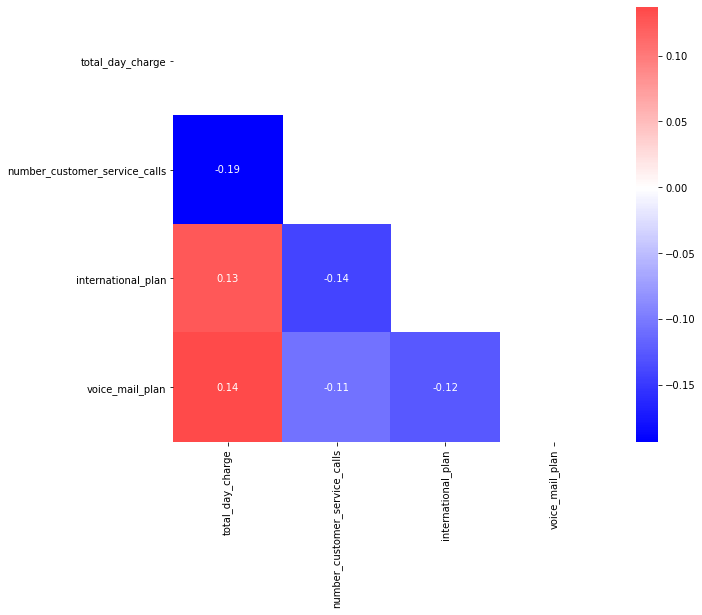

In [373]:
# We ran some preliminary exploratory analysis on the churn test dataset
# Here we are checking for correlations between our selected 4 features in the test dataset

# Compute the correlation matrix
corr = test_data_Numer_Customer_Calls_More_Than_4_Features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Heatmap
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, cmap=plt.cm.bwr, center=0, annot=True, fmt='.2f', square=True)

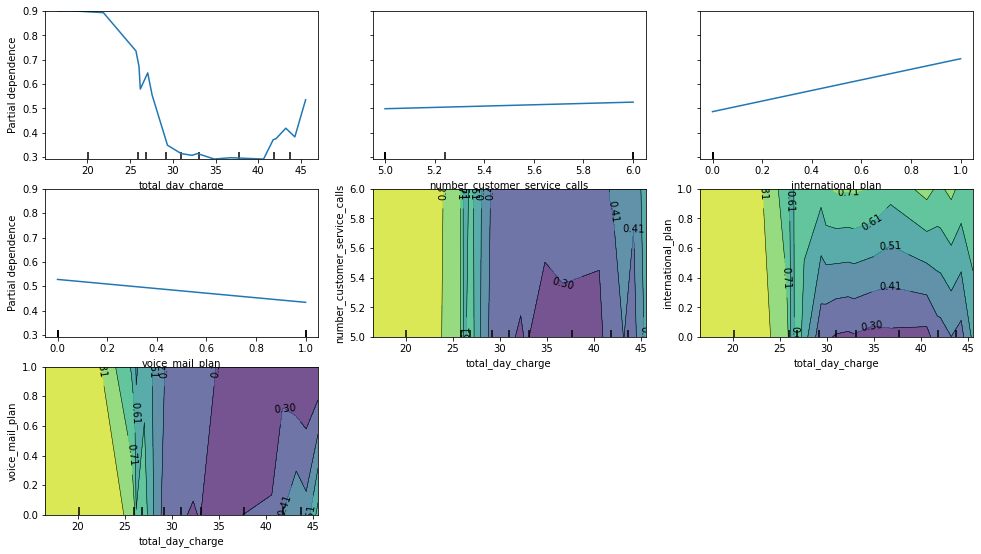

In [374]:
# Interpretability Technique 1: PDP FOR SUBSET Number of Customer Calls > 4
# PDP for total_day_charge, number_customer_service_calls, international_plan, voice_mail_plan
# The first 4 plots are 1D PDP exploring the impact of 1 feature towards churn, the last 3 plots are 2D PDP exploring the impact among the features

fig, ax = plt.subplots(figsize=(14, 8))
PartialDependenceDisplay.from_estimator(estimator=rf, X=test_data_Numer_Customer_Calls_More_Than_4_Features,  features=[0,1,2,3,(0,1), (0,2), (0,3)], ax=ax)
fig.tight_layout(pad=2.0)

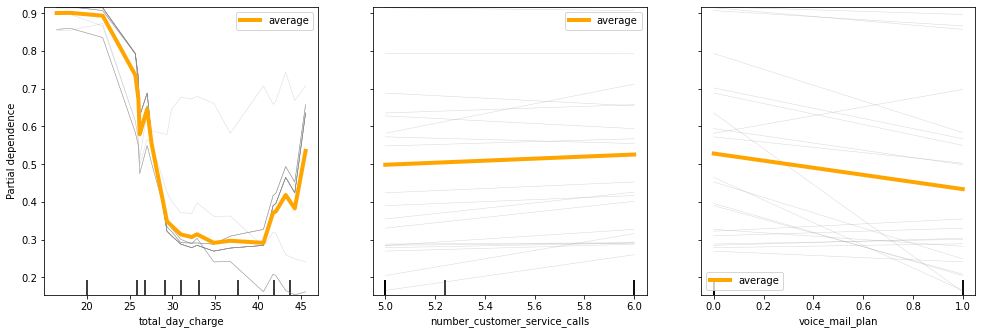

In [375]:
# Interpretability Technique 2: ICE FOR SUBSET INTERNATIONAL PLAN
# These are 1D plots exploring the impact of 1 feature towards churn behavior
# The average of each ICE line represent the PDP plot

fig, ax = plt.subplots(figsize=(14, 5))
ice = PartialDependenceDisplay.from_estimator(estimator=rf,
                        X=test_data_Numer_Customer_Calls_More_Than_4_Features,
                        features=[0,1,3],
                        kind="both",
                        ice_lines_kw={"color":"#808080","alpha": 0.3, "linewidth": 0.5},
                        pd_line_kw={"color": "#ffa500", "linewidth": 4, "alpha":1},
                        ax=ax)
fig.tight_layout(pad=2.0)